In [2]:
import numpy as np
import pandas as pd

D = {
    'appearance' : [1,0,0,1,0,1,1,0,1,0],
    'charac' : [1,1,0,1,1,0,1,0,0,1],
    'optmistic' : [2,1,0,1,2,1,0,2,2,0],
    'label' : [1,0,0,1,1,0,1,0,1,0]
}

Data = pd.DataFrame(D)
Data

,appearance,charac,optmistic,label
0,1,1,2,1
1,0,1,1,0
2,0,0,0,0
3,1,1,1,1
4,0,1,2,1
5,1,0,1,0
6,1,1,0,1
7,0,0,2,0
8,1,0,2,1
9,0,1,0,0


In [75]:
Data['label'].value_counts()

1    5
0    5
Name: label, dtype: int64

In [4]:
# 为了观察为测试，我们首先按label进行一个排序
Data.sort_values(by = 'label')

,appearance,charac,optmistic,label
1,0,1,1,0
2,0,0,0,0
5,1,0,1,0
7,0,0,2,0
9,0,1,0,0
0,1,1,2,1
3,1,1,1,1
4,0,1,2,1
6,1,1,0,1
8,1,0,2,1


In [52]:
# 先对一个小df下手，计算在label=1的条件下各个特征下类别的概率

DF0 = Data[Data['label'] == 0]
DF0

,appearance,charac,optmistic,label
1,0,1,1,0
2,0,0,0,0
5,1,0,1,0
7,0,0,2,0
9,0,1,0,0


In [53]:
# 首先使用切片的方法，切掉label 那一列，然后使用apply(axis = 0)的方法，对每一个特征（列）做循环
# 每个特征，使用value_counts()/个数的方式，计算出条件概率
DF0.iloc[:, :-1].apply(lambda i : i.value_counts()/i.size, axis = 0)

,appearance,charac,optmistic
0,0.8,0.6,0.4
1,0.2,0.4,0.4
2,NaN,NaN,0.2


In [28]:
DF1

,appearance,charac,optmistic,label
0,1,1,2,1
3,1,1,1,1
4,0,1,2,1
6,1,1,0,1
8,1,0,2,1


In [43]:
# 首先将上面的这写好的函数来进行封装，只要传进去一个小DF,就能计算出条件概率
def conditonal_prob(df):
    return df.iloc[:, :-1].apply(lambda i : i.value_counts()/i.size, axis = 0)


# 使用groupby('label')，会生小DataFrame，这里生成了2个小dataframe，label为0的Dataframe和label为1的dataframe
# 可以直接使用apply对这个两小dataframe做循环
# lambda的意思传进来一个小Dataframe，立马将这个小Dataframe用上面的函数做处理，计算条件概率，别输出出来

Data.groupby('label').apply(lambda df : conditonal_prob(df))

# 上面这个代码进行简写
# Data.groupby('label').apply(conditonal_prob)

# 1. 先运行Data.groupby('label')，然后生成了DF0和DF1
# 2. 依次将这些DF0和DF1，作为df， 传入conditonal_prob，得到条件的结果

appearance  charac  optmistic
label                                 
0     0         0.8     0.6        0.4
      1         0.2     0.4        0.4
      2         NaN     NaN        0.2
1     0         0.2     0.2        0.2
      1         0.8     0.8        0.2
      2         NaN     NaN        0.6

In [51]:
list(Data.groupby('label'))

[(0,    appearance  charac  optmistic  label
  1           0       1          1      0
  2           0       0          0      0
  5           1       0          1      0
  7           0       0          2      0
  9           0       1          0      0),
 (1,    appearance  charac  optmistic  label
  0           1       1          2      1
  3           1       1          1      1
  4           0       1          2      1
  6           1       1          0      1
  8           1       0          2      1)]

In [46]:
# 还有个老版本

#首先使用简单的for循环的方式取出当前
#将标签值取出来，且进行一个排序
# label = Data['label'].unique()
# label.sort()
# label_d = {}

# #最美一个标签做for循环。在每个循环里面，取出这个标签所对应的数据集
# for i in label:
#     df = Data[Data['label'] == i].iloc[:, :-1]
#     df_series_list = []
#     for j in df.columns:
#         col = df[j]
#         #对一个特定的标签值里面算valuecounts并且算出占比
#         col_p = col.value_counts()/col.shape[0]
#         #将这个信息存到list里面去, col_p里面包含了列名的信息
#         df_series_list.append(col_p)
#     #col_p里面包含了在类别i下，各个特征里每一个值所对应的概率值
#     #可以使用concat的方法来进行拼接
#     label_d[i] = pd.concat(df_series_list, axis = 1)

In [47]:
# 将计算出的所有的条件概率的结果记录在一个变量里面方便后面来测试集的时候好进行提取
bayes_result = Data.groupby('label').apply(lambda df : conditonal_prob(df))
bayes_result

appearance  charac  optmistic
label                                 
0     0         0.8     0.6        0.4
      1         0.2     0.4        0.4
      2         NaN     NaN        0.2
1     0         0.2     0.2        0.2
      1         0.8     0.8        0.2
      2         NaN     NaN        0.6

In [56]:
# 来了一个预测的数据集

test_data = [1, 0, 0]
Data.columns[:-1]

# 可以尝试使用zip的方式1对1对的将test_data里面的数据提取出来

Index(['appearance', 'charac', 'optmistic'], dtype='object')

In [132]:
# 我们可以将标签为1的条件下，测试集发生的概率，一对一对的将我们想提取的东西拿出来
for i, j in zip(test_data, Data.columns[:-1]):
    print('P({} = {}|Y = 1)'.format(j, i))

P(appearance = 1|Y = 1)
P(charac = 0|Y = 1)
P(optmistic = 0|Y = 1)


In [133]:
bayes_result

appearance  charac  optmistic
label                                 
0     0         0.8     0.6        0.4
      1         0.2     0.4        0.4
      2         NaN     NaN        0.2
1     0         0.2     0.2        0.2
      1         0.8     0.8        0.2
      2         NaN     NaN        0.6

In [58]:
# 当前bayes有多级索引，所以这个时候我们需要使用显示索引的方式将概率值给提取出来
# 我们如果想取出label = 1下P(appearance = 1|Y = 1)，P(charac = 0|Y = 1)，P(optmistic = 0|Y = 1)值的话
# 就需要通过loc的方式取出, loc[(1(这里是第一层行索引), i(第一层行索引为1下的第i个行索引)), j(特征名字)]

l = []
for i, j in zip(test_data, Data.columns[:-1]):
    print(bayes_result.loc[(1, i), j])

0.8
0.2
0.2


In [66]:
# list comprehension, 列表解析式
# 在label = 1的标签下，当前所有的条件概率
[bayes_result.loc[(1, i), j] for i,j in zip(test_data, Data.columns[:-1])]

# 在label = 0的标签下，当前所有的条件概率
[bayes_result.loc[(0, i), j] for i,j in zip(test_data, Data.columns[:-1])]

# 可以将其写成一个函数
def finding(test_data, label):
    return [bayes_result.loc[(label, i), j] for i,j in zip(test_data, Data.columns[:-1])]

In [68]:
# 测试这个函数
finding(test_data, label = 1)

[0.8, 0.2, 0.2]

In [70]:
# 给出这个测试集在标签等于0和标签等于1下所有的条件概率
# 将结果转化乘numpy array
prob_0 = np.array(finding(test_data, label = 0))
prob_1 = np.array(finding(test_data, label = 1))
prob_0, prob_1

(array([0.2, 0.6, 0.4]), array([0.8, 0.2, 0.2]))

$$P(帅|嫁)P(性格不好|嫁)P(不上进|嫁)$$

In [74]:
# numpy array有求乘积的方法，使用求乘积的方法来计算出最后的概率值
prob_0.prod()

(0.048, 0.03200000000000001)

$$P(帅|不嫁)P(性格不好|不嫁)P(不上进|不嫁)$$

In [134]:
prob_1.prod()

0.03200000000000001

In [138]:
# 将label的概率求出来
label_p = Data['label'].value_counts()/Data.shape[0]
label_p

1    0.5
0    0.5
Name: label, dtype: float64

$$P(嫁|帅，性格不好，不上进)=P(嫁)\frac{P(帅|嫁)P(性格不好|嫁)P(不上进|嫁)}{P(帅，性格不好，不上进)}$$
$$P(不嫁|帅，性格不好，不上进)=P(不嫁)\frac{P(帅|不嫁)P(性格不好|不嫁)P(不上进|不嫁)}{P(帅，性格不好，不上进)}$$

In [140]:
prob_0.prod() * label_p[0], prob_1.prod() * label_p[1]

(0.024, 0.016000000000000004)

In [141]:
# 最后0标签的概率大一些，一个将test_data = [1, 0, 0]预测成标签0

In [204]:
# 将上面的部分写成函数
label_p = Data['label'].value_counts()/Data.shape[0]
label_p = label_p.sort_index()

def conditonal_prob(df):
    return df.iloc[:, :-1].apply(lambda i : i.value_counts()/i.size, axis = 0)

bayes_result = Data.groupby('label').apply(lambda df : conditonal_prob(df)).fillna(0)

# 这里是提取了数据当中有多少独一无二的类别
l = Data['label'].unique()
test_data = [1,0,0]

# 构造了一个函数，传进去test = [1,0,0]这样的测试样本，就可以来预测最后的结果
def quick_predict(test_data):
    # 这里采用了类似于双层for循环的列表解析式，将数据记录在p_result里面
    p_result = [np.array([bayes_result.loc[(label,i), j] \
         for i,j in zip(test_data, bayes_result.columns)]).prod() \
         for label in l]
    # 当test_data = [1,0,0]的时候，p_result是[0.032, 0,048], 第一个是label为0下相乘所得到的概率，第二个是label为1下相乘所得到的概率
    # 需要做成一个pd.Series,并且把相应的索引加上去，按索引从小到大排序
    result_intermediate = pd.Series(p_result, index = l).sort_index()
    
    #print(result_intermediate)
    #print(label_p)
    
    # 需要将先验的概率给乘上去，这里的result_intermediate和label_p两个series的索引label,都是从小到大排序的，0,1所以可以直接来乘
    result = result_intermediate * label_p
    #print(result)
    # 对结果做数值上的从小到大的排序，取出索引的最后一个，因为排序后最后一个索引的概率值肯定是最大的
    return result.sort_values().index[-1]
    #return result.sort_values().index[-1]

In [205]:
quick_predict([1,1,2])

1

In [206]:
Y_pred = Data.apply(lambda i : quick_predict(i), axis = 1)
Data['pred'] = Y_pred
Data

,appearance,charac,optmistic,label,pred
0,1,1,2,1,1
1,0,1,1,0,0
2,0,0,0,0,0
3,1,1,1,1,1
4,0,1,2,1,1
5,1,0,1,0,0
6,1,1,0,1,1
7,0,0,2,0,0
8,1,0,2,1,1
9,0,1,0,0,0


In [80]:
# gaussian朴素贝叶斯

from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [82]:
# 导入数据集
digits = load_digits()
X = digits.data
Y = digits.target

In [83]:
X.shape

(1797, 64)

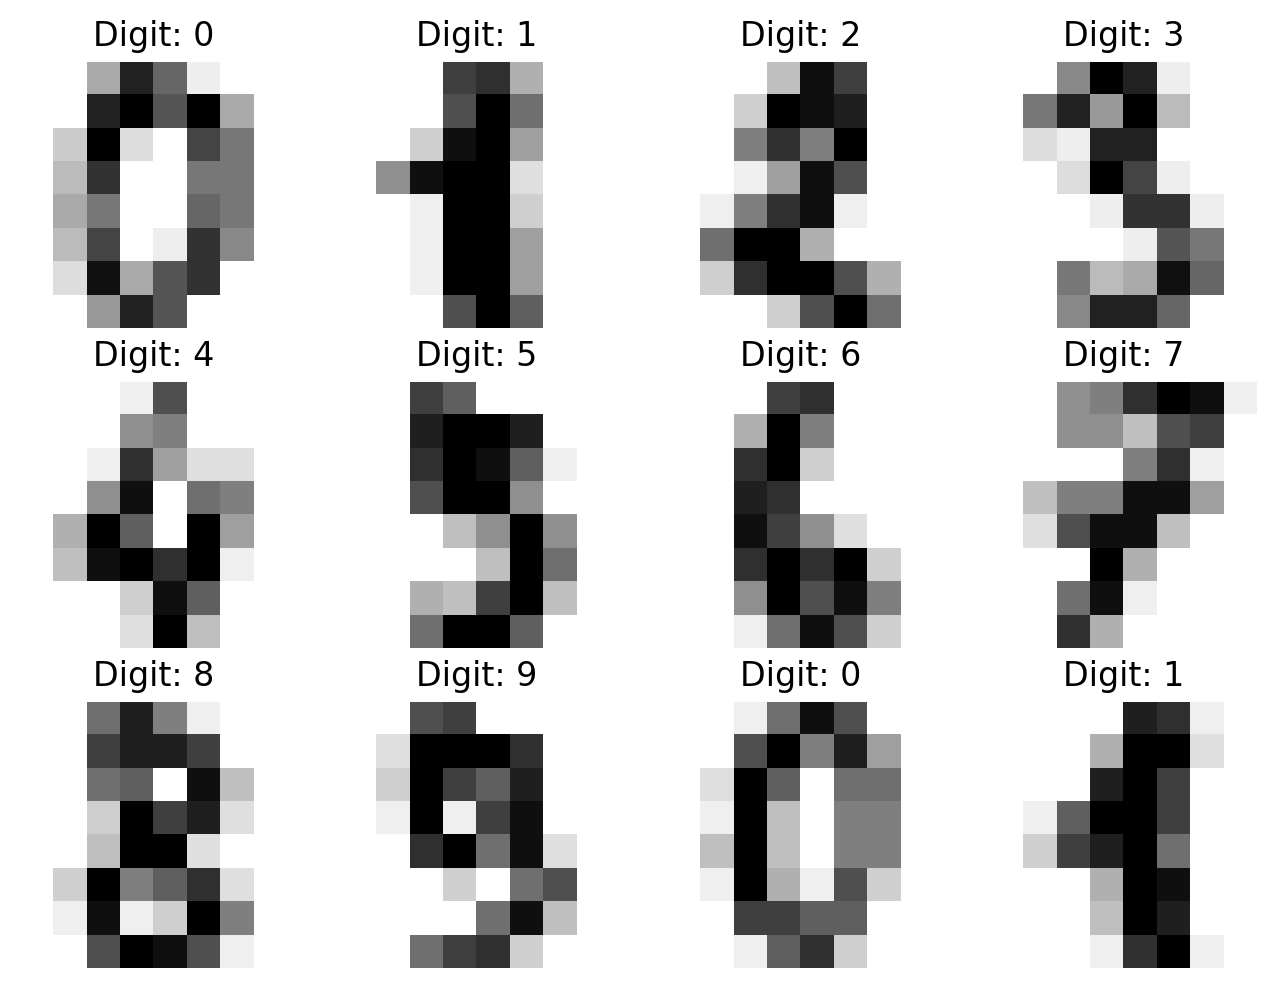

In [90]:
#这是一个8*8的矩阵。每个数字是64个数。
#X数据集里面每一个行是64个数。
#每一行代表的就是一个数字的图像

#可以尝试将这个图给画出来，我们可以选取前12个数

%matplotlib inline

images_and_labels = list(zip(digits.images, digits.target))

plt.figure(figsize=(8,6), dpi=200)
for index, (image, label) in enumerate(images_and_labels[:12]):
    plt.subplot(3,4, index+1)
    plt.axis('off')
    plt.imshow(image, cmap = plt.cm.gray_r, interpolation='nearest')
    plt.title('Digit: {}'.format(label))

In [91]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [100]:
# 开始上模型

GNB = GaussianNB()
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.3, random_state = 420)

In [101]:
GNB.fit(Xtrain, Ytrain)
GNB.score(Xtrain, Ytrain), GNB.score(Xtest, Ytest)

(0.8528241845664281, 0.8592592592592593)

In [106]:
# 对于这部分数据集来说，想上很多的不一样的算法，比较各个算法的优缺点

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from time import time
import datetime

In [108]:
#首先定义一个学习曲线

def plot_learning_curve(estimator,title, X, y, 
                        ax, #选择子图
                        ylim=None, #设置纵坐标的取值范围
                        cv=None, #交叉验证
                        n_jobs=None #设定索要使用的线程
                       ):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y
                                                            ,cv=cv,n_jobs=n_jobs)    
    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    ax.grid() #显示网格作为背景，不是必须
    ax.plot(train_sizes, np.mean(train_scores, axis=1), 'o-'
            , color="r",label="Training score")
    ax.plot(train_sizes, np.mean(test_scores, axis=1), 'o-'
            , color="g",label="Test score")
    ax.legend(loc="best")
    return ax

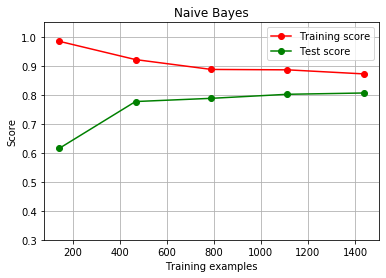

In [116]:
estimator = GaussianNB()
plt.figure()
plot_learning_curve(estimator, 'Naive Bayes', X, Y, ax = plt.gca(), 
                    ylim = [0.3, 1.05], n_jobs = 4, cv = 5)

# 1. 这个学习曲线，是不断来增大训练样本，观测模型在训练集和测试集下的表现
# 2. 训练集的分数随着样本量的增大而下降。是因为数据集越大，噪音就会越多，是的训练出来的模型分数会略微低一点
# 3. 在测试集上面随着样本量的增大，数据集里面X与Y真实规律体现的就越好，所以学习出来的模型，在测试表现的就越来越好了
# 4. 这个图可以尝试用来观测当前是否出现过拟合的现象，就是训练集和测试集之间的分数的差值非常非常的大
# 5. 也是可以观测欠拟合，在训练集上，模型就已经不是很好

Naive Bayes:00:01:106606
DecisionTree:00:01:122232
SVM, RBF kernel:00:06:857227
RandomForest:00:11:367779
Adaboost:00:23:604612


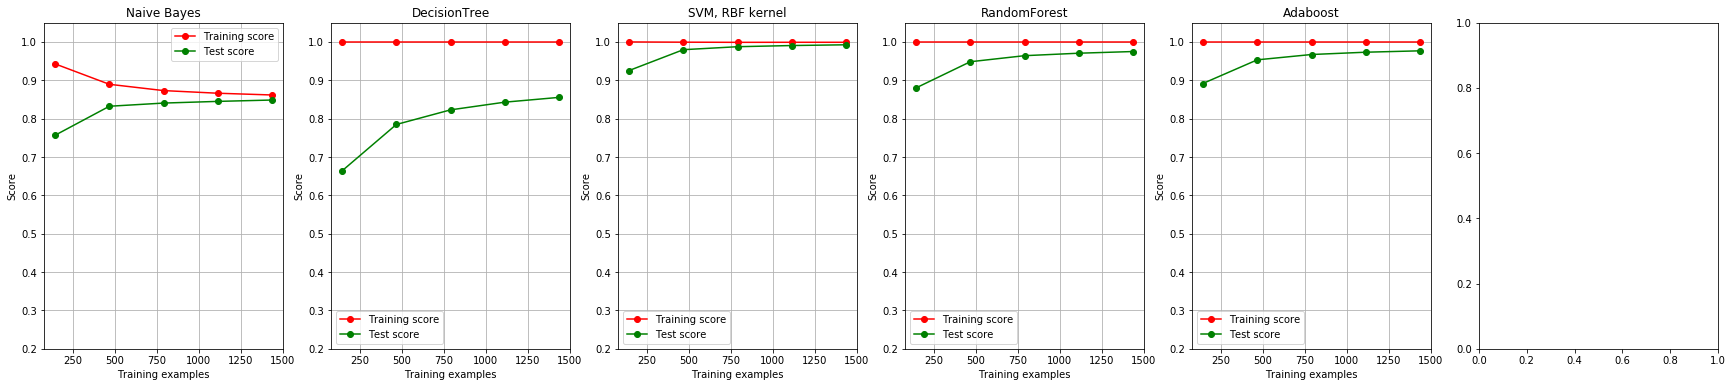

In [124]:
from sklearn.ensemble import AdaBoostClassifier
#ShuffleSplit：一种不同于K折交叉验证的交叉验证模式
cv = ShuffleSplit(n_splits=50 #分50组，进行五十次交叉验证
                  , test_size=0.2 #从这50组中，抽取20%来做测试集，每次做切分都重新打乱了顺序
                  , random_state=0)

#使用5个模型，并且每一个模型都给实例化好
title = ["Naive Bayes","DecisionTree","SVM, RBF kernel","RandomForest","Adaboost"] 
model = [GaussianNB(),DTC(),SVC(gamma=0.001)
         ,RFC(n_estimators=50),AdaBoostClassifier(base_estimator = RFC())]


#作图，使用for循环的方式来将各个estimator直接放入上面写好了学习曲线模型
#且对于每一个模型来说，都记录各个模型的运行的时间

fig, axes = plt.subplots(1,6,figsize=(30,6))
for ind,title_,estimator in zip(range(len(title)),title,model):
    times = time()
    plot_learning_curve(estimator, title_, X, Y,
                        ax=axes[ind], ylim = [0.2, 1.05],n_jobs=4, cv=cv)
    print("{}:{}".format(title_,datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f")))
plt.show()

In [121]:
# 1. 从分数来看，SVM>RF,Log>Bayes, DT过拟合，Adaboost前拟合
# 2. 从时间上来看，逻辑回归的时间最长，因为是回归类算法，64个特征全部都要进行计算，第二逻辑回归处理稀疏矩阵的效率不高
# 3. 从时间上看，决策树的时间还是比较短的，因为在决策树构建的过程当中，优先的选择那几个最重要的特征在做树的构建，与预测的
# 4. 所以64个特征使用特征可能很少，从而使得时间非常短。